In [45]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [8]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2.0
beautifulsoup4                     4.9.3
bitarray                           

In [3]:
df_canada = pd.read_excel("data/Canada.xlsx", sheet_name="Canada by Citizenship",
                          skiprows=range(20), skipfooter=2)
df_canada.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"], inplace=True)
df_canada.rename(columns={"OdName": "Country", "AreaName": "Area", "RegName": "Region"}, inplace=True)
df_canada["Total"] = df_canada.sum(axis=1)
df_canada

,Country,Area,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [4]:
!conda install -c conda-forge wordcloud --yes

Solving environment: ...working... done

# All requested packages already installed.



In [9]:
with open("data/alice_novel.txt", "r") as f:
    alice_novel = f.read()

print(alice_novel[:500])

mistune                            0.8.4
mkl-fft                            1.2.0
mkl-random                         1.1.1
mkl-service                        2.3.0
mock                               4.0.2
more-itertools                     8.6.0
mpmath                             1.1.0
msgpack                            1.0.0
multipledispatch                   0.6.0
navigator-updater                  0.2.1
nbclient                           0.5.1
nbconvert                          6.0.7
nbformat                           5.0.8
nest-asyncio                       1.4.2
networkx                           2.5
nltk                               3.5
nose                               1.3.7
notebook                           6.1.4
numba                              0.51.2
numexpr                            2.7.1
numpy                              1.19.2
numpydoc                           1.1.0
olefile                            0.46
openpyxl                           3.0.5
packaging          

In [10]:
alice_wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    max_words=2000
)

alice_wc.generate(alice_novel)

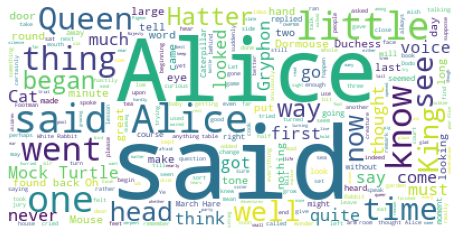

In [13]:
plt.figure(figsize=(8, 5))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [14]:
STOPWORDS.add("must")
STOPWORDS.add("said")
STOPWORDS.add("much")

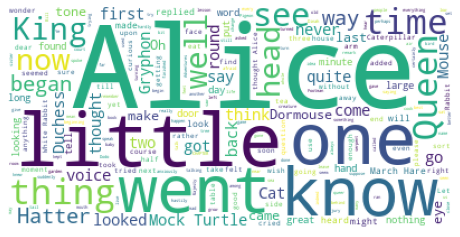

In [15]:
alice_wc.generate(alice_novel)
plt.figure(figsize=(8, 5))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [25]:
img = Image.open("data/alice_mask.png")
alice_mask = np.array(img)
print(alice_mask, alice_mask.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] (900, 900)


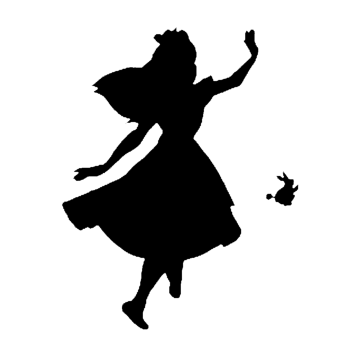

In [26]:
plt.figure(figsize=(6, 10))
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [27]:
alice_wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    max_words=2000,
    mask=alice_mask
)
alice_wc.generate(alice_novel)

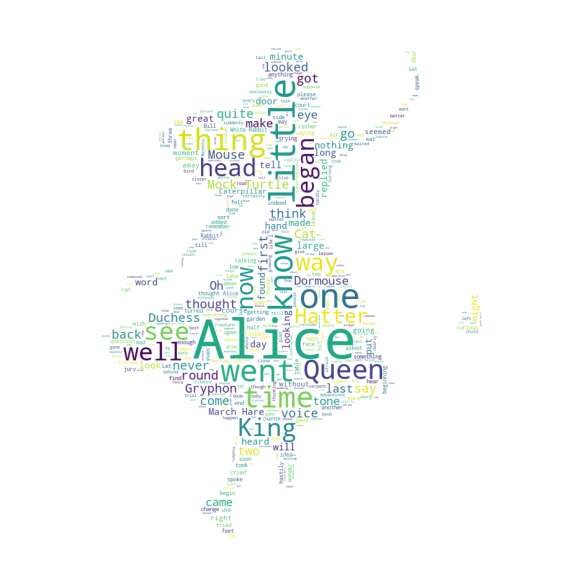

In [28]:
plt.figure(figsize=(10, 14))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [29]:
int(90 * (df_canada[df_canada.Country == "China"]["Total"] / df_canada.Total.sum()))

9

In [30]:
max_words = 1000
text = ""

for country in df_canada.Country:
    if len(country.split(" ")) == 1:
        repeat_country = int(
            max_words*df_canada.loc[df_canada.Country == country, "Total"] / float(df_canada.Total.sum())
        )
        text = text + ((country + " ") * repeat_country)

print(text)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China C

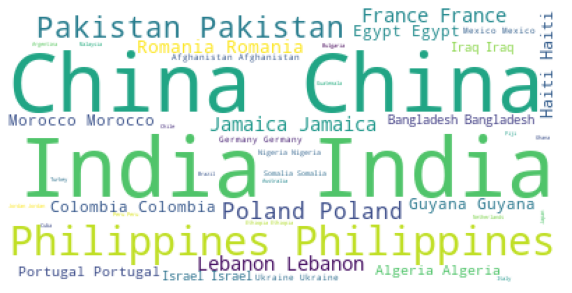

In [31]:
canada_wc = WordCloud(background_color="white")
canada_wc.generate(text)

plt.figure(figsize=(10, 14))
plt.imshow(canada_wc)
plt.axis("off")
plt.show()

In [32]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = years
df_total.reset_index(inplace=True)
df_total.columns = ["Years", "Total"]

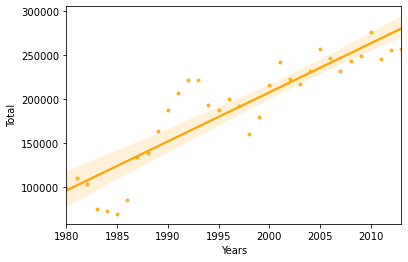

In [35]:
sns.regplot(x="Years", y="Total", data=df_total, color="orange", marker=".")
plt.show()

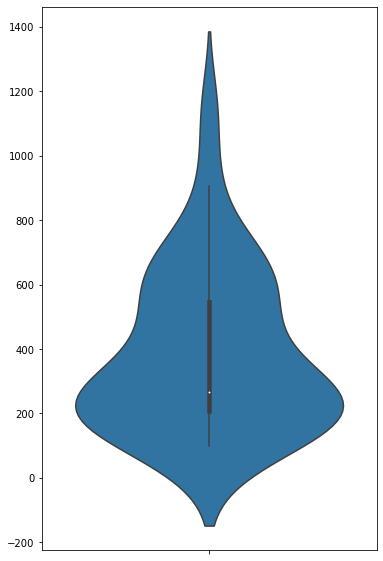

In [36]:
plt.figure(figsize=(6, 10))
sns.violinplot(y=df_canada.loc[df_canada.Country == "Indonesia", years].values)
plt.show()

In [37]:
data_seaborn = sns.load_dataset("tips")

In [38]:
data_seaborn

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


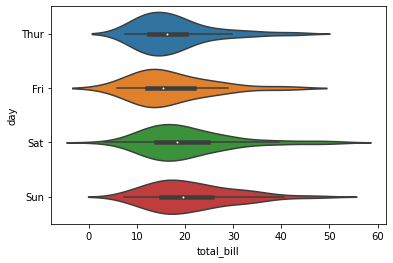

In [39]:
sns.violinplot(x="total_bill", y="day", data=data_seaborn)
plt.show()

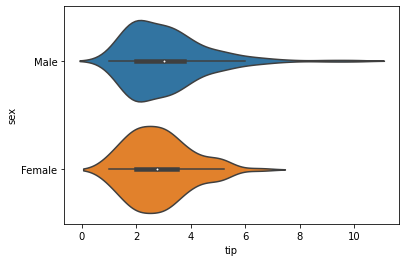

In [40]:
sns.violinplot(x="tip", y="sex", data=data_seaborn)
plt.show()

In [44]:
!pip install folium

In [46]:
folium.__version__

'0.12.1'

In [47]:
world_map = folium.Map()
world_map

In [48]:
hacktiv8_map = folium.Map(location=[-6.259758863560389, 106.78170203053368], zoom_start=15, tiles="Stamen Toner")
hacktiv8_map

In [49]:
hacktiv8_map = folium.Map(location=[-6.259758863560389, 106.78170203053368], zoom_start=15, tiles="Stamen Terrain")
hacktiv8_map

In [53]:
df_incidents = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")
df_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [54]:
sample_incidents = df_incidents.sample(n=100, random_state=11)
sample_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
54319,160559939,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Monday,07/11/2016 12:00:00 AM,13:54,SOUTHERN,NONE,1200 Block of HOWARD ST,-122.412350,37.775556,"(37.775555848279, -122.412349694893)",16055993904012
19247,160340960,OTHER OFFENSES,RESISTING ARREST,Tuesday,04/26/2016 12:00:00 AM,08:11,SOUTHERN,"ARREST, BOOKED",0 Block of 12TH ST,-122.420001,37.774095,"(37.7740948566882, -122.420001436964)",16034096027170
15545,160380568,NON-CRIMINAL,"LICENSE PLATE, RECOVERED",Friday,05/06/2016 12:00:00 AM,15:30,INGLESIDE,NONE,700 Block of HURON AV,-122.450451,37.711448,"(37.7114481484715, -122.450450654907)",16038056871012
58109,160595422,NON-CRIMINAL,AIDED CASE,Sunday,07/24/2016 12:00:00 AM,06:30,MISSION,NONE,BRYANT ST / 17TH ST,-122.410366,37.764311,"(37.7643113176295, -122.410365570579)",16059542251040
12839,160348889,FRAUD,"CREDIT CARD, THEFT BY USE OF",Thursday,04/21/2016 12:00:00 AM,12:25,RICHMOND,NONE,300 Block of PARKER AV,-122.453720,37.779643,"(37.7796427850804, -122.453720324214)",16034888909320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29244,160073161,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/26/2016 12:00:00 AM,03:42,PARK,"ARREST, BOOKED",DIVISADERO ST / GROVE ST,-122.437990,37.775925,"(37.775924865346, -122.437990176327)",16007316165016
115862,166057076,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,03/06/2016 12:00:00 AM,04:15,BAYVIEW,NONE,SILVER AV / PALOU AV,-122.396517,37.737156,"(37.7371564713337, -122.396516726913)",16605707606224
30203,160007897,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Monday,01/04/2016 12:00:00 AM,01:39,RICHMOND,"ARREST, BOOKED",27TH AV / CLEMENT ST,-122.487020,37.781921,"(37.7819210927148, -122.487019920352)",16000789762020
100355,160964883,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,11/27/2016 12:00:00 AM,12:00,TENDERLOIN,NONE,0 Block of GROVE ST,-122.415642,37.778832,"(37.7788323158792, -122.415642487855)",16096488364070


In [55]:
latitude = 37.77
longitude = -122.42

sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
sf_map

In [57]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=.7
        )
    )

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker((lat, lng), popup=label).add_to(sf_map)

sf_map.add_child(incidents)

In [58]:
sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker(
        (lat, lng),
        popup=label,
        icon=None,
    ).add_to(incidents)

sf_map

In [59]:
sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker(
        (lat, lng),
        popup=label,
        icon=None,
    ).add_to(incidents)

sf_map